In [1]:
pip install category_encoders


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# STANDARD LIBRARIES
import os
import warnings
warnings.filterwarnings("ignore")

# THIRD PARTY LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pydataset
import scipy.stats as stats
import category_encoders as ce

#statistical tests
from scipy import stats
from scipy.stats import pearsonr, spearmanr



# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
import matplotlib
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from math import sqrt

In [3]:
import acquire 
import prepare

In [4]:
df = acquire.get_fifa_data()

In [5]:
df = prepare.prepped_data(df)

Before dropping nulls, 142079 rows, 111 cols
After dropping nulls. 131489 rows. 66 cols
After cleaning the data and adding additional columns there are: 98804 rows. 83 cols


In [6]:
goalkeeper_df, forward_df, midfielder_df, defender_df = prepare.acquire_players_by_position(df)

In [7]:
goalkeeper_df.shape

(11367, 83)

In [8]:
forward_df.shape

(18494, 83)

In [9]:
midfielder_df.shape

(36682, 83)

In [10]:
defender_df.shape

(32261, 83)

# Step 1: Assign all player positions to a dataframe

In [ ]:
#GK
goalkeepers = df[(df.club_position == 'GK')]

In [ ]:
goalkeepers.shape

In [ ]:
#ST, RS, LS, LW, RW, LF, CF
forwards = df[(df.club_position == 'ST') | (df.club_position == 'RS') | (df.club_position == 'LS') | (df.club_position == 'LW') | (df.club_position == 'RW') | (df.club_position == 'LF') | (df.club_position == 'CF')]


In [ ]:
forwards.shape

In [ ]:
#LCM, RCM, RM, LM, CAM, LDM, RDM, CDM, LAM, RAM 
midfielders = df[(df.club_position == 'LCM') | (df.club_position == 'RCM') | (df.club_position == 'RM') | (df.club_position == 'LM') | (df.club_position == 'CAM') | (df.club_position == 'LDM') | (df.club_position == 'RDM') | (df.club_position == 'CDM') | (df.club_position == 'LAM') | (df.club_position == 'RAM')] 


In [ ]:
midfielders.shape

In [ ]:
#RCB, LCB, LB, RB, CB, RWB, LWB
defenders = df[(df.club_position == 'RCB') | (df.club_position == 'LCB') | (df.club_position == 'LB') | (df.club_position == 'RB') | (df.club_position == 'CB') | (df.club_position == 'RWB') | (df.club_position == 'LWB')]

In [ ]:
defenders.shape

In [ ]:
reserve = df[df.club_position == 'RES']


In [ ]:
reserve.shape

In [ ]:
substitute = df[df.club_position == 'SUB']

In [ ]:
substitute.shape

In [ ]:
df.shape

# Step 2: Separate RESERVE Player dataframe by player position

In [ ]:
reserve.shape

In [ ]:
reserve['player_positions'] = reserve['player_positions'].str.split(',').str[0]

In [ ]:
df_reserve_goalkeepers = reserve[reserve.player_positions == 'GK']

In [ ]:
df_reserve_goalkeepers.shape

In [ ]:
#ST, RS, LS, LW, RW, LF, CF
df_reserve_forwards = reserve[(reserve.player_positions == 'ST') | (reserve.player_positions == 'RW') | (reserve.player_positions == 'LW') | (reserve.player_positions == 'CF')]

In [ ]:
df_reserve_forwards.shape

In [ ]:
#LCM, RCM, RM, LM, CAM, LDM, RDM, CDM, LAM, RAM 
df_reserve_midfielders = reserve[(reserve.player_positions == 'CM') | (reserve.player_positions == 'CDM') | (reserve.player_positions == 'CAM') | (reserve.player_positions == 'RM') | (reserve.player_positions == 'LM')]

In [ ]:
df_reserve_midfielders.shape

In [ ]:
#RCB, LCB, LB, RB, CB, RWB, LWB
df_reserve_defenders = reserve[(reserve.player_positions == 'CB') | (reserve.player_positions == 'LB') | (reserve.player_positions == 'RB') | (reserve.player_positions == 'LWB') | (reserve.player_positions == 'RWB')]

In [ ]:
df_reserve_defenders.shape

# Step 3: Separate SUBSTITUTE Player dataframe by player position

In [ ]:
substitute.shape

In [ ]:
substitute['player_positions'] = substitute['player_positions'].str.split(',').str[0]


In [ ]:
df_substitute_goalkeeper = substitute[substitute.player_positions == 'GK']

In [ ]:
df_substitute_goalkeeper.shape

In [ ]:
df_substitute_forward = substitute[(substitute.player_positions == 'ST') | (substitute.player_positions == 'RW') | (substitute.player_positions == 'LW') | (substitute.player_positions == 'CF')]

In [ ]:
df_substitute_forward.shape

In [ ]:
df_substitute_midfielders = substitute[(substitute.player_positions == 'CM') | (substitute.player_positions == 'CDM') | (substitute.player_positions == 'CAM') | (substitute.player_positions == 'LM') | (substitute.player_positions == 'RM')]

In [ ]:
df_substitute_midfielders.shape

In [ ]:
df_substitute_defenders = substitute[(substitute.player_positions == 'CB') | (substitute.player_positions == 'LB') | (substitute.player_positions == 'RB') | (substitute.player_positions == 'RWB') | (substitute.player_positions == 'LWB')]

In [ ]:
df_substitute_defenders.shape

# Step 4: Concat Dataframes together 


In [ ]:
goalkeeper_df = pd.concat([goalkeepers, df_substitute_goalkeeper, df_reserve_goalkeepers], axis=0)

In [ ]:
goalkeeper_df.shape

In [ ]:
forward_df = pd.concat([forwards, df_substitute_forward, df_reserve_forwards], axis=0)

In [ ]:
forward_df.shape

In [ ]:
midfielder_df = pd.concat([midfielders, df_substitute_midfielders, df_reserve_midfielders], axis=0)

In [ ]:
midfielder_df.shape

In [ ]:
defender_df = pd.concat([defenders, df_substitute_defenders, df_reserve_defenders], axis=0)

In [ ]:
defender_df.shape

# Step 5: Correlation for each position

In [ ]:
goalkeeper_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(10)

In [ ]:
forward_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(10)

In [ ]:
midfielder_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(10)

In [ ]:
defender_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(15)

# Clusters based on Correlation

_Prepare the Data_

In [11]:
#split
train, validate, test = prepare.split(goalkeeper_df)

Train: 7728 rows, 83 cols
Validate: 1933 rows, 83 cols
Test: 1706 rows, 83 cols


In [12]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

_Encode categorical variables_ 

In [13]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

(7728, 80)

In [14]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

(7728, 80)

In [15]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe()

,sofifa_id,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_team_id,club_name,...,league_yr_sum,club_name_yr_sum,seniority,club_position_encoded,work_rate_encoded,preferred_foot_encoded,age_bins_encoded,weight_bins_encoded,body_type_encoded,league_encoded
count,"7,728.00","7,728.00","7,728.00","7,728.00","7,728.00","7,728.00","7,728.00","7,728.00","7,728.00","7,728.00",...,"7,728.00","7,728.00","7,728.00","7,728.00","7,728.00","7,728.00","7,728.00","7,728.00","7,728.00","7,728.00"
mean,-0.19,0.58,-0.96,0.07,0.05,0.04,0.02,0.01,0.42,0.59,...,0.50,0.64,0.40,-0.01,0.00,-0.10,0.30,617.53,0.05,0.21
std,0.96,2.40,2.97,0.73,0.76,0.62,0.79,0.78,0.49,1.55,...,1.29,1.83,0.88,0.88,0.00,0.30,0.46,"2,178.81",1.32,0.77
min,-4.85,-0.80,-42.43,-1.73,-2.44,-1.11,-3.17,-3.00,-0.02,-0.40,...,-0.55,-0.40,-0.33,-1.00,0.00,-1.00,-0.01,"-7,147.90",-3.00,-0.69
25%,-0.58,-0.60,-0.71,-0.45,-0.44,-0.44,-0.50,-0.50,-0.01,-0.22,...,-0.33,-0.24,-0.33,-1.00,0.00,0.00,-0.00,-0.79,0.00,-0.38
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.42,0.40,0.29,0.55,0.56,0.56,0.50,0.50,0.99,0.78,...,0.67,0.76,0.67,0.00,0.00,0.00,1.00,0.21,0.00,0.62
max,1.13,25.78,0.36,2.55,2.67,2.11,3.33,3.50,1.03,13.23,...,4.61,14.26,8.33,1.43,0.00,0.00,1.00,"5,819.71",6.00,2.31


# Goalkeeper Clusters

#### ANOVA test on gk_handling, gk_diving, gk_reflexes

In [16]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['gk_handling', 'gk_diving', 'gk_reflexes']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

KMeans(n_clusters=4)

In [17]:
X_train_scaled_df['clusters'] = kmeans.predict(X)

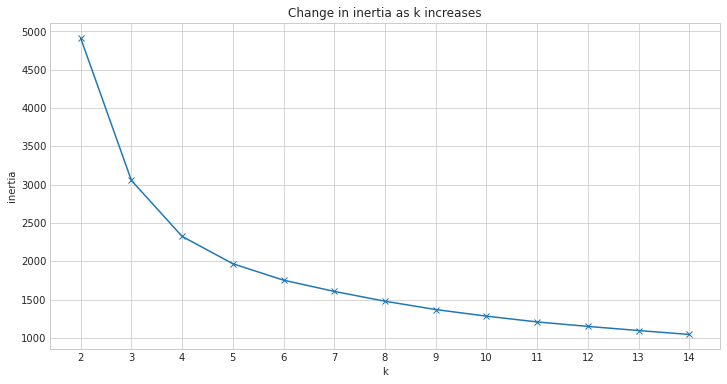

In [18]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [19]:
X_train_scaled_df.groupby('clusters')[ 'gk_handling', 'gk_diving', 'gk_reflexes'].mean()

,gk_handling,gk_diving,gk_reflexes
clusters,,,
0,67.30,70.10,71.59
1,53.26,55.45,56.02
2,75.70,78.81,80.20
3,60.71,63.23,64.03


#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [20]:
α = 0.05

F, p = stats.f_oneway(X_train_scaled_df[X_train_scaled_df.clusters == 0].wage_eur,
                      X_train_scaled_df[X_train_scaled_df.clusters == 1].wage_eur,
                      X_train_scaled_df[X_train_scaled_df.clusters == 2].wage_eur,
                      X_train_scaled_df[X_train_scaled_df.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)

Anova Test Results on goalkeeper handling/diving/reflexes Cluster
F-value:  1910.26469852438
p-value:  0.0


In [21]:
if p < α:
    print(f'Reject null hypothesis')
else:
    print(f'Fail to reject null hypothesis')

Reject null hypothesis


In [22]:
goalkeeper_0 = X_train_scaled_df[X_train_scaled_df.clusters == 0]
goalkeeper_1 = X_train_scaled_df[X_train_scaled_df.clusters == 1]
goalkeeper_2 = X_train_scaled_df[train.clusters == 2]
goalkeeper_3 = train[train.clusters == 3]

# Goalkeeping Model

#### Tweedie Regression Model (GLM)

In [ ]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.wage_eur)

# predict train
y_train['wage_eur_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.wage_eur, y_train.wage_eur_pred_glm)**(1/2)

# predict validate
y_validate['wage_eur_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.wage_eur, y_validate.wage_eur_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", f'{rmse_train:.2f}', 
      "\nValidation/Out-of-Sample: ", f'{rmse_validate_glm:.2f}')

In [ ]:
#residuals
y_train['glm_residuals'] = y_train['wage_eur_pred_glm'] - y_train['wage_eur']
y_validate['glm_residuals'] = y_validate['wage_eur_pred_glm'] - y_validate['wage_eur']

# Prepare Forwards

In [23]:
#split
train, validate, test = prepare.split(forward_df)

Train: 12575 rows, 83 cols
Validate: 3144 rows, 83 cols
Test: 2775 rows, 83 cols


In [24]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

In [25]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

(12575, 80)

In [26]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

(12575, 80)

In [27]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# FORWARD CLUSTERS

#### ANOVA test on ball_control, reactions, dribbling

In [28]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['ball_control', 'reactions', 'dribbling']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

KMeans(n_clusters=4)

In [29]:
train['clusters'] = kmeans.predict(X)

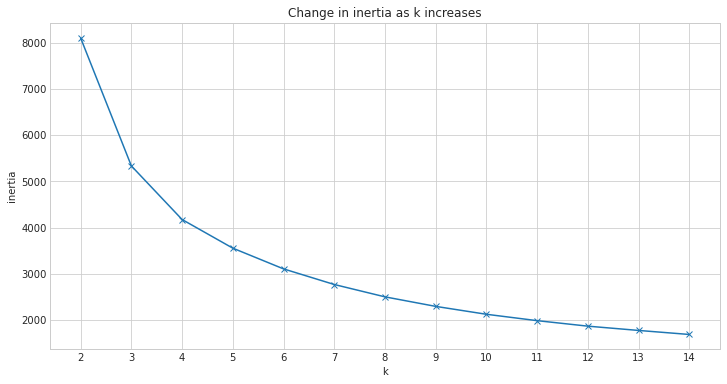

In [30]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [31]:
train.groupby('clusters')[ 'ball_control', 'reactions', 'dribbling'].median()

,ball_control,reactions,dribbling
clusters,,,
0,79.00,77.00,78.00
1,55.00,51.00,55.00
2,71.00,68.00,70.00
3,63.00,59.00,63.00


#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [32]:
α = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)


Anova Test Results on goalkeeper handling/diving/reflexes Cluster
F-value:  2068.6969947516845
p-value:  0.0


In [33]:
if p < α:
    print(f'Reject null hypothesis')
else:
    print(f'Fail to reject null hypothesis')

Reject null hypothesis


In [34]:
forward_0 = train[train.clusters == 0]
forward_1 = train[train.clusters == 1]
forward_2 = train[train.clusters == 2]
forward_3 = train[train.clusters == 3]

In [60]:
train.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,club_name_yr_sum,seniority,club_position_encoded,work_rate_encoded,preferred_foot_encoded,age_bins_encoded,weight_bins_encoded,body_type_encoded,league_encoded,clusters
74247,214741,F. Bahamondes,RB,62,64,"275,000.00","5,000.00",27,177,79,...,"20,594,600.00",1,12,8,2,2,2,2,19,0
53627,247931,A. Van Hoorenbeeck,LB,60,69,"525,000.00","2,000.00",22,187,77,...,"59,524,400.00",3,22,5,1,2,2,5,13,0
9344,209997,K. Wimmer,CB,77,83,"8,000,000.00","60,000.00",22,187,85,...,"887,458,000.00",1,12,5,1,2,2,4,2,1
56470,143013,P. Ferrari,RB,69,69,"575,000.00","9,000.00",32,169,67,...,"87,643,400.00",4,17,5,2,1,1,6,1,3
51318,223278,E. Özgenç,RB,69,69,"650,000.00","10,000.00",31,177,70,...,"90,350,000.00",2,12,5,2,1,2,2,8,3


In [59]:
forward_0.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,club_name_yr_sum,seniority,club_position_encoded,work_rate_encoded,preferred_foot_encoded,age_bins_encoded,weight_bins_encoded,body_type_encoded,league_encoded,clusters
43863,216700,M. Meza,"LW, CAM, RM",77,78,"10,500,000.00","45,000.00",26,180,76,...,"267,852,000.00",1,3,8,2,2,2,3,10,0
14540,198951,C. Bakambu,ST,81,85,"22,000,000.00","40,000.00",25,182,73,...,"341,770,000.00",2,12,5,2,2,2,2,5,0
40036,192598,Ai Kesen,ST,79,79,"17,000,000.00","32,000.00",30,180,77,...,"53,370,200.00",2,2,9,2,1,2,9,29,0
14594,146011,I. Uche,"ST, CF, RW",78,78,"7,500,000.00","60,000.00",30,175,73,...,"341,770,000.00",4,10,5,2,1,2,2,5,0
55314,184252,L. Pratto,ST,80,80,"13,500,000.00","33,000.00",31,187,91,...,"201,500,000.00",2,21,8,2,1,3,7,1,0


# Prepare Midfielders

In [35]:
#split
train, validate, test = prepare.split(midfielder_df)

Train: 24943 rows, 83 cols
Validate: 6236 rows, 83 cols
Test: 5503 rows, 83 cols


In [36]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

In [37]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

(24943, 80)

In [38]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

(24943, 80)

In [39]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Midfielder Cluster

#### ANOVA test on ball_control, reactions, passing

In [40]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['ball_control', 'reactions', 'passing']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

KMeans(n_clusters=4)

In [41]:
train['clusters'] = kmeans.predict(X)

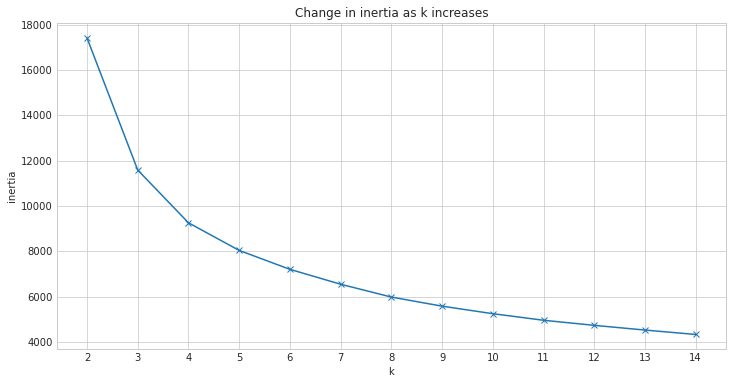

In [42]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [43]:
train.groupby('clusters')[ 'ball_control', 'reactions', 'passing'].median()

,ball_control,reactions,passing
clusters,,,
0,64.00,60.00,59.00
1,71.00,67.00,66.00
2,56.00,51.00,52.00
3,78.00,75.00,74.00


#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [44]:
α = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)

Anova Test Results on goalkeeper handling/diving/reflexes Cluster
F-value:  5364.360909423364
p-value:  0.0


In [45]:
if p < α:
    print(f'Reject null hypothesis')
else:
    print(f'Fail to reject null hypothesis')

Reject null hypothesis


In [46]:
midfielder_0 = train[train.clusters == 0]
midfielder_1 = train[train.clusters == 1]
midfielder_2 = train[train.clusters == 2]
midfielder_3 = train[train.clusters == 3]

# Prepare Defenders

In [47]:
#split
train, validate, test = prepare.split(defender_df)

Train: 21936 rows, 83 cols
Validate: 5485 rows, 83 cols
Test: 4840 rows, 83 cols


In [48]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

In [49]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

(21936, 80)

In [50]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

(21936, 80)

In [51]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Defender Clusters 

#### ANOVA test on marking, potential, short_passing

In [52]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['marking', 'potential', 'short_passing']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

KMeans(n_clusters=4)

In [53]:
train['clusters'] = kmeans.predict(X)

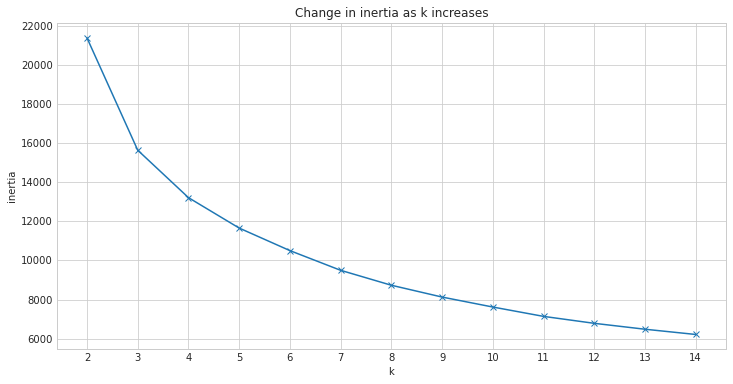

In [54]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [55]:
train.groupby('clusters')[ 'ball_control', 'reactions', 'passing'].median()

,ball_control,reactions,passing
clusters,,,
0,56.00,57.00,51.00
1,69.00,73.00,64.00
2,41.00,51.00,35.00
3,61.00,64.00,56.00


#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [56]:
α = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)

Anova Test Results on goalkeeper handling/diving/reflexes Cluster
F-value:  4762.5344713075665
p-value:  0.0


In [57]:
if p < α:
    print(f'Reject null hypothesis')
else:
    print(f'Fail to reject null hypothesis')

Reject null hypothesis


In [58]:
defender_0 = train[train.clusters == 0]
defender_1 = train[train.clusters == 1]
defender_2 = train[train.clusters == 2]
defender_3 = train[train.clusters == 3]

# Goalkeeping Model

#### Tweedie Regression Model (GLM)

In [ ]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.wage_eur)

# predict train
y_train['wage_eur_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.wage_eur, y_train.wage_eur_pred_glm)**(1/2)

# predict validate
y_validate['wage_eur_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.wage_eur, y_validate.wage_eur_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", f'{rmse_train:.2f}', 
      "\nValidation/Out-of-Sample: ", f'{rmse_validate_glm:.2f}')

In [ ]:
#residuals
y_train['glm_residuals'] = y_train['wage_eur_pred_glm'] - y_train['wage_eur']
y_validate['glm_residuals'] = y_validate['wage_eur_pred_glm'] - y_validate['wage_eur']